In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/preprocessed_store_sales.csv")
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,IsWeekend,isMonthStart,isMonthEnd,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales_Rolling7,Sales_Lag1
0,1,5,2015-07-31,-0.132683,-0.168269,1,1,1,2015,7,31,1,0,1,1,0,0,0,-0.168715,NaN
1,2,5,2015-07-31,0.075373,-0.017540,1,1,1,2015,7,31,1,0,1,1,0,0,0,-0.036441,-0.132684
2,3,5,2015-07-31,0.659800,0.404499,1,1,1,2015,7,31,1,0,1,1,0,0,0,0.255353,0.075372
3,4,5,2015-07-31,2.135414,1.862258,1,1,1,2015,7,31,1,0,1,1,0,0,0,0.870319,0.659799
4,5,5,2015-07-31,-0.247231,-0.159656,1,1,1,2015,7,31,1,0,1,1,0,0,0,0.633382,2.135414


In [ ]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'year', 'month', 'day', 'IsWeekend', 'isMonthStart',
       'isMonthEnd', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Sales_Rolling7', 'Sales_Lag1'],
      dtype='object')

In [ ]:
# Define features and target
X = data.drop(columns=['Sales'])
y = data['Sales']


# Check for missing values
print(X.isnull().sum())

# Fill NaN values with a placeholder
X.fillna(0, inplace=True)


Store             0
DayOfWeek         0
Date              0
Customers         0
Open              0
Promo             0
SchoolHoliday     0
year              0
month             0
day               0
IsWeekend         0
isMonthStart      0
isMonthEnd        0
StateHoliday_0    0
StateHoliday_a    0
StateHoliday_b    0
StateHoliday_c    0
Sales_Rolling7    0
Sales_Lag1        1
dtype: int64


In [ ]:
#convert 'Date' to numerical representation using Label Encoding
label_encoder = LabelEncoder()
X['Date'] = label_encoder.fit_transform(X['Date'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.12202942314406844
Mean Squared Error (MSE): 0.03906186049273292
Root Mean Squared Error (RMSE): 0.19764073591426673
R² Score: 0.9608506570300093


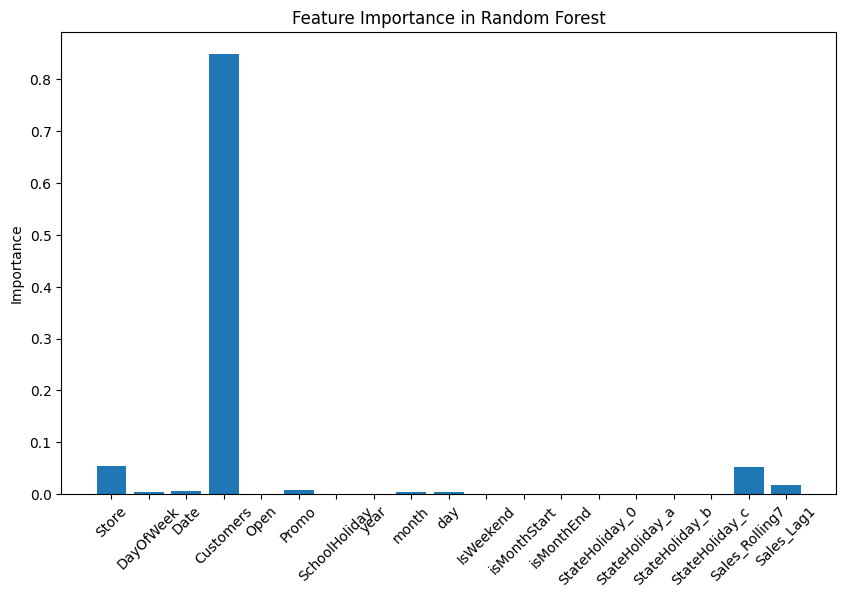

In [ ]:

# Get feature importance
feature_importances = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xticks(rotation=45)
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [ ]:
import joblib
from datetime import datetime

# Save the model
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
joblib.dump(model, f"sales_model_{timestamp}.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=12.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=12.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=12.1min
